In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pulp import *

We want to find the maximum solution to:

Z = 4x + 3y

constraints:

x ≥ 0 

y ≥ 2

2y ≤ 25 - x

4y ≥ 2x - 8

y ≤ 2x - 5


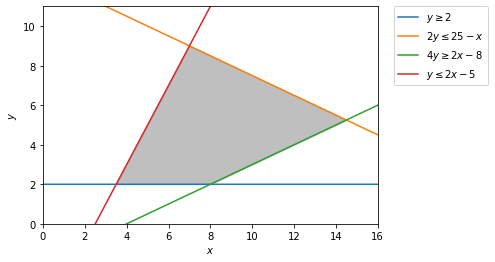

In [2]:
## Graph the problem, specifically the constraints

x = np.linspace(0,20,2000)

# y >= 2
y1 = (x*0) + 2

#2y <= 25 - x
y2 = (25-x)/2.0

#4y > 2x-8
y3 = (2*x-8)/4.0

# y <= 2x-5
y4 = 2 * x - 5

# Plot

plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

#Fill solution space grey

y5 = np.minimum(y2,y4)
y6 = np.maximum(y1,y3)
plt.fill_between(x, y5,y6, where = y5>y6, color="grey", alpha = .5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [3]:
## Define problem
my_lp_problem = LpProblem("My_LP_Problem", LpMaximize)

In [4]:
## Define Decision Variables
x = LpVariable("x", lowBound= 0, cat="Continuous")
y = LpVariable("y", lowBound =2, cat="Continuous")

In [5]:
# Objective Function

my_lp_problem += 4*x + 3*y, "Z"

# Constraints
my_lp_problem += 2*y <= 25 - x
my_lp_problem += 4*y >= 2*x -8
my_lp_problem += y <= 2*x - 5

In [21]:
my_lp_problem

My_LP_Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

In [7]:
my_lp_problem.solve()
LpStatus[my_lp_problem.status]

'Optimal'

In [8]:
for variable in my_lp_problem.variables():
    print( "{} = {}".format(variable.name, variable.varValue))

x = 14.5
y = 5.25


In [9]:
print(pulp.value(my_lp_problem.objective))

73.75


**New Problem - Resourcing Problem**

Decide how many cars of each type to produce to maximize profit

30 day timespan, One Robot, 2 engineers, one detailer (only has 21 days)

Two car types need different times with each resource:

**Robot time: Car A - 3 days; Car B - 4 days.**

**Engineer time: Car A - 5 days; Car B - 6 days.**

**Detailer time: Car A - 1.5 days; Car B - 3 days.**

**Car A = 30,000$ Profit**

**Car B = 45,000$ Profit**

This Problem can be formalized as:

Max Profit= 30,000A + 45,000B<br>

Subject to:

A ≥ 0

B ≥ 0

3A + 4B ≤ 30

5A + 6B ≤ 60 #since we have to engineers 30x2 = 60 days

1.5A + 3B ≤ 21

In [10]:
# define model
model = LpProblem("Maxprofit", LpMaximize)

In [5]:
#path_to_gpl = r"C:\Users\michi\Downloads\winglpk-4.65\glpk-4.65\w64\glpsol.exe"
solver = GLPK_CMD(path= r"C:\Users\michi\Downloads\winglpk-4.65\glpk-4.65\w64\glpsol.exe")

In [11]:
## Define decision variables
A = LpVariable("A_var", lowBound = 0, cat = "Integer")
B = LpVariable("B_var", lowBound = 0, cat = "Integer")

In [12]:
# Objective function
model += 30000 * A + 45000 * B, "Profit"

# Constraints
model += 3 * A + 4 * B <= 30
model += 5 * A + 6 * B <= 60
model += 1.5 * A + 3 * B <= 21

In [20]:
model

Maxprofit:
MAXIMIZE
30000*A_var + 45000*B_var + 0
SUBJECT TO
_C1: 3 A_var + 4 B_var <= 30

_C2: 5 A_var + 6 B_var <= 60

_C3: 1.5 A_var + 3 B_var <= 21

VARIABLES
0 <= A_var Integer
0 <= B_var Integer

In [13]:
model.solve()
LpStatus[model.status]

'Optimal'

In [17]:
# Print our decision variable values
print ("Production of Car A = {}".format(A.varValue))
print( "Production of Car B = {}".format(B.varValue))

Production of Car A = 2
Production of Car B = 6


In [19]:
# Print our objective function value
print (pulp.value(model.objective))

330000


In [ ]:
pulpTestAll()

In [15]:
solver_list = listSolvers(onlyAvailable=True)

**Problem 3 - Blending Problem**


| Ingredient | Cost (€/kg)  | Availability (kg) |
|------------|--------------|-------------------|
|  Pork      | 4.32         | 30                |
|  Wheat     | 2.46         | 20                |
|  Starch    | 1.86         | 17                

 2 types of sausage:

Economy (>40% Pork)
Premium (>60% Pork)

One sausage is 50 grams (0.05 kg)

According to government regulations, the most starch we can use in our sausages is 25%

We have a contract with a butcher, and have already purchased 23 kg pork, that will go bad if it's not used.

We have a demand for 350 economy sausages and 500 premium sausages.

We need to figure out how to most cost effectively blend our sausages.

Let's model our problem

 *p<sub>e</sub>* = Pork in the economy sausages (kg) <br>
*w<sub>e</sub>* = Wheat in the economy sausages (kg)<br>
*s<sub>e</sub>* = Starch in the economy sausages (kg)<br>
*p<sub>p</sub>* = Pork in the premium sausages (kg)<br>
*w<sub>p</sub>* = Wheat in the premium sausages (kg)<br>
*s<sub>p</sub>* = Starch in the premium sausages (kg)<br>

We want to minimise costs such that:

Cost = 4.32(*p<sub>e</sub>* + *p<sub>p</sub>*) + 2.46(*w<sub>e</sub>* + *w<sub>p</sub>*) + 1.86(*s<sub>e</sub>* + *s<sub>p</sub>*)

Constraints:

*p<sub>e</sub>* + *w<sub>e</sub>* + *s<sub>e</sub>* = 350 * 0.05 <br>
*p<sub>p</sub>* + *w<sub>p</sub>* + *s<sub>p</sub>* = 500 * 0.05 <br>
*p<sub>e</sub>* ≥ 0.4(*p<sub>e</sub>* + *w<sub>e</sub>* + *s<sub>e</sub>*)<br> 
*p<sub>p</sub>* ≥ 0.6(*p<sub>p</sub>* + *w<sub>p</sub>* + *s<sub>p</sub>*) <br>
*s<sub>e</sub>* ≤ 0.25(*p<sub>e</sub>* + *w<sub>e</sub>* + *s<sub>e</sub>*) <br>
*s<sub>p</sub>* ≤ 0.25(*p<sub>p</sub>* + *w<sub>p</sub>* + *s<sub>p</sub>*) <br>
*p<sub>e</sub>* + *p<sub>p</sub>* ≤ 30 <br>
*w<sub>e</sub>* + *w<sub>p</sub>* ≤ 20 <br>
*s<sub>e</sub>* + *s<sub>p</sub>* ≤ 17 <br>
*p<sub>e</sub>* + *p<sub>p</sub>* ≥ 23<br>

In [41]:
model = LpProblem("CostMin", LpMinimize)

In [42]:
# Construct decision variable lists - more efficient way to define the variables and call them later on in our objective function

sausage_types = ["economy", "premium"]
ingredients = ["pork", "wheat", "starch"]

In [43]:
ing_weight = LpVariable.dicts("weight kg", 
                              ((i, j) for i in sausage_types for j in ingredients),
                              lowBound = 0,
                              cat = "Continuous")

In [44]:
ing_weight

{('economy', 'pork'): weight_kg_('economy',_'pork'),
 ('economy', 'wheat'): weight_kg_('economy',_'wheat'),
 ('economy', 'starch'): weight_kg_('economy',_'starch'),
 ('premium', 'pork'): weight_kg_('premium',_'pork'),
 ('premium', 'wheat'): weight_kg_('premium',_'wheat'),
 ('premium', 'starch'): weight_kg_('premium',_'starch')}

In [45]:
# Objective function

model += (pulp.lpSum([
            4.32 * ing_weight[(i, "pork")]
            + 2.46 * ing_weight[(i, "wheat")]
            + 1.86 * ing_weight[(i, "starch")]
            for i in sausage_types])
         )

In [46]:
model

CostMin:
MINIMIZE
4.32*weight_kg_('economy',_'pork') + 1.86*weight_kg_('economy',_'starch') + 2.46*weight_kg_('economy',_'wheat') + 4.32*weight_kg_('premium',_'pork') + 1.86*weight_kg_('premium',_'starch') + 2.46*weight_kg_('premium',_'wheat') + 0.0
VARIABLES
weight_kg_('economy',_'pork') Continuous
weight_kg_('economy',_'starch') Continuous
weight_kg_('economy',_'wheat') Continuous
weight_kg_('premium',_'pork') Continuous
weight_kg_('premium',_'starch') Continuous
weight_kg_('premium',_'wheat') Continuous

In [47]:
# Constraints 
#350 economy and 500 premium sausages at 0.05kg
model += pulp.lpSum([ing_weight['economy', j] for j in ingredients]) == 350 * 0.05
model += pulp.lpSum([ing_weight['premium', j] for j in ingredients]) == 500 * 0.05

# Economy >= 40% pork and premium >= 60% pork
model += ing_weight['economy', 'pork'] >= (
    0.4 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'pork'] >= (
    0.6 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# Sausages must be <= 25% starch

model += ing_weight['economy', 'starch'] <= (
    0.25 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'starch'] <= (
    0.25 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# Supplier capacity - 30kg pork, 20kg wheat, 17kg starch

model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) <= 30
model += pulp.lpSum([ing_weight[i, 'wheat'] for i in sausage_types]) <= 20
model += pulp.lpSum([ing_weight[i, 'starch'] for i in sausage_types]) <= 17

# Must at least use 23kg pork

model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) >= 23



In [48]:
model

CostMin:
MINIMIZE
4.32*weight_kg_('economy',_'pork') + 1.86*weight_kg_('economy',_'starch') + 2.46*weight_kg_('economy',_'wheat') + 4.32*weight_kg_('premium',_'pork') + 1.86*weight_kg_('premium',_'starch') + 2.46*weight_kg_('premium',_'wheat') + 0.0
SUBJECT TO
_C1: weight_kg_('economy',_'pork') + weight_kg_('economy',_'starch')
 + weight_kg_('economy',_'wheat') = 17.5

_C2: weight_kg_('premium',_'pork') + weight_kg_('premium',_'starch')
 + weight_kg_('premium',_'wheat') = 25

_C3: 0.6 weight_kg_('economy',_'pork') - 0.4 weight_kg_('economy',_'starch')
 - 0.4 weight_kg_('economy',_'wheat') >= 0

_C4: 0.4 weight_kg_('premium',_'pork') - 0.6 weight_kg_('premium',_'starch')
 - 0.6 weight_kg_('premium',_'wheat') >= 0

_C5: - 0.25 weight_kg_('economy',_'pork')
 + 0.75 weight_kg_('economy',_'starch') - 0.25 weight_kg_('economy',_'wheat')
 <= 0

_C6: - 0.25 weight_kg_('premium',_'pork')
 + 0.75 weight_kg_('premium',_'starch') - 0.25 weight_kg_('premium',_'wheat')
 <= 0

_C7: weight_kg_('econom

In [49]:
model.solve()
LpStatus[model.status]

'Optimal'

In [52]:
for var in ing_weight:
    var_value = ing_weight[var].varValue
    print("The weight of {0} in {1} sausages is {2} kg".format(var[1], var[0], var_value))

The weight of pork in economy sausages is 8.0 kg
The weight of wheat in economy sausages is 5.125 kg
The weight of starch in economy sausages is 4.375 kg
The weight of pork in premium sausages is 15.0 kg
The weight of wheat in premium sausages is 3.75 kg
The weight of starch in premium sausages is 6.25 kg


In [57]:
total_cost = pulp.value(model.objective)
print("The total cost is €{} for 350 economy sausages and 500 premium sausages".format(round(total_cost, 2)))

The total cost is €140.96 for 350 economy sausages and 500 premium sausages


**Problem 4 - Scheduling problem**

- 2 offshore production plants in 2 locations
- Estimated demand for our products

Want to find the production schedule for both plants that meets demand at the lowest cost

Factory can be either:
- off = Producing 0 units (controlled by binary variable)
- on = Producing between minimium and capacity

Both factories have fixed cost that occur when they are open, and variable production costs which vary per month.

Factory B will be down for maintenance in month 5

In [2]:
import pandas as pd

In [4]:
# Import information regarding the factories = Capacity, var cost, fix cost for each month
factories = pd.read_csv("https://raw.githubusercontent.com/benalexkeen/Introduction-to-linear-programming/master/csv/factory_variables.csv", index_col= ["Month", "Factory"])
factories

Max_Capacity  Min_Capacity  Variable_Costs  Fixed_Costs
Month Factory                                                         
1     A              100000         20000              10          500
      B               50000         20000               5          600
2     A              110000         20000              11          500
      B               55000         20000               4          600
3     A              120000         20000              12          500
      B               60000         20000               3          600
4     A              145000         20000               9          500
      B              100000         20000               5          600
5     A              160000         20000               8          500
      B                   0             0               0            0
6     A              140000         20000               8          500
      B               70000         20000               6          600
7     A              155000         20000               5          500
      B               60000         20000               4          600
8     A              200000         20000               7          500
      B              100000         20000               6          600
9     A              210000         20000               9          500
      B              100000         20000               8          600
10    A              197000         20000              10          500
      B              100000         20000              11          600
11    A               80000         20000               8          500
      B              120000         20000              10          600
12    A              150000         20000               8          500
      B              150000         20000              12          600

In [6]:
# Import monthly total demand
demand = pd.read_csv("https://raw.githubusercontent.com/benalexkeen/Introduction-to-linear-programming/master/csv/monthly_demand.csv", index_col=["Month"])
demand

,Demand
Month,
1,120000
2,100000
3,130000
4,130000
5,140000
6,130000
7,150000
8,170000
9,200000


In [8]:
# Define our variables - Production for each month and each factory 1A - 1B - 2A - 2B etc.

production = LpVariable.dicts("production",
                                ((month, factory) for month, factory in factories.index),
                               lowBound = 0,
                               cat = "Integer")

In [9]:
production

{(1, 'A'): production_(1,_'A'),
 (1, 'B'): production_(1,_'B'),
 (2, 'A'): production_(2,_'A'),
 (2, 'B'): production_(2,_'B'),
 (3, 'A'): production_(3,_'A'),
 (3, 'B'): production_(3,_'B'),
 (4, 'A'): production_(4,_'A'),
 (4, 'B'): production_(4,_'B'),
 (5, 'A'): production_(5,_'A'),
 (5, 'B'): production_(5,_'B'),
 (6, 'A'): production_(6,_'A'),
 (6, 'B'): production_(6,_'B'),
 (7, 'A'): production_(7,_'A'),
 (7, 'B'): production_(7,_'B'),
 (8, 'A'): production_(8,_'A'),
 (8, 'B'): production_(8,_'B'),
 (9, 'A'): production_(9,_'A'),
 (9, 'B'): production_(9,_'B'),
 (10, 'A'): production_(10,_'A'),
 (10, 'B'): production_(10,_'B'),
 (11, 'A'): production_(11,_'A'),
 (11, 'B'): production_(11,_'B'),
 (12, 'A'): production_(12,_'A'),
 (12, 'B'): production_(12,_'B')}

In [10]:
# model factory status as binary - for each month and factory again

factory_status = LpVariable.dicts("factory_status",
                                  ((month, factory) for month, factory in factories.index),
                                  cat = "Binary")

In [11]:
factory_status

{(1, 'A'): factory_status_(1,_'A'),
 (1, 'B'): factory_status_(1,_'B'),
 (2, 'A'): factory_status_(2,_'A'),
 (2, 'B'): factory_status_(2,_'B'),
 (3, 'A'): factory_status_(3,_'A'),
 (3, 'B'): factory_status_(3,_'B'),
 (4, 'A'): factory_status_(4,_'A'),
 (4, 'B'): factory_status_(4,_'B'),
 (5, 'A'): factory_status_(5,_'A'),
 (5, 'B'): factory_status_(5,_'B'),
 (6, 'A'): factory_status_(6,_'A'),
 (6, 'B'): factory_status_(6,_'B'),
 (7, 'A'): factory_status_(7,_'A'),
 (7, 'B'): factory_status_(7,_'B'),
 (8, 'A'): factory_status_(8,_'A'),
 (8, 'B'): factory_status_(8,_'B'),
 (9, 'A'): factory_status_(9,_'A'),
 (9, 'B'): factory_status_(9,_'B'),
 (10, 'A'): factory_status_(10,_'A'),
 (10, 'B'): factory_status_(10,_'B'),
 (11, 'A'): factory_status_(11,_'A'),
 (11, 'B'): factory_status_(11,_'B'),
 (12, 'A'): factory_status_(12,_'A'),
 (12, 'B'): factory_status_(12,_'B')}

In [13]:
# define model to minimize costs
model = LpProblem("Costmin_scheduling", LpMinimize)

In [14]:
# Define objective function including: Variable cost for each unit produced and fixed cost if factory is open that month

model += lpSum(
    [production[month, factory] * factories.loc[(month, factory), "Variable_Costs"] for month, factory in factories.index]
    + [factory_status[month, factory] * factories.loc[(month, factory), "Fixed_Costs"] for month, factory in factories.index]
)

In [15]:
model

Costmin_scheduling:
MINIMIZE
500*factory_status_(1,_'A') + 600*factory_status_(1,_'B') + 500*factory_status_(10,_'A') + 600*factory_status_(10,_'B') + 500*factory_status_(11,_'A') + 600*factory_status_(11,_'B') + 500*factory_status_(12,_'A') + 600*factory_status_(12,_'B') + 500*factory_status_(2,_'A') + 600*factory_status_(2,_'B') + 500*factory_status_(3,_'A') + 600*factory_status_(3,_'B') + 500*factory_status_(4,_'A') + 600*factory_status_(4,_'B') + 500*factory_status_(5,_'A') + 500*factory_status_(6,_'A') + 600*factory_status_(6,_'B') + 500*factory_status_(7,_'A') + 600*factory_status_(7,_'B') + 500*factory_status_(8,_'A') + 600*factory_status_(8,_'B') + 500*factory_status_(9,_'A') + 600*factory_status_(9,_'B') + 10*production_(1,_'A') + 5*production_(1,_'B') + 10*production_(10,_'A') + 11*production_(10,_'B') + 8*production_(11,_'A') + 10*production_(11,_'B') + 8*production_(12,_'A') + 12*production_(12,_'B') + 11*production_(2,_'A') + 4*production_(2,_'B') + 12*production_(3,_'A') 

In [18]:
# Constraints 
# Production must be equal to demand

months = demand.index
for month in months:
    model += production[(month, "A")] + production[(month, "B")] == demand.loc[month, "Demand"]

In [19]:
model

Costmin_scheduling:
MINIMIZE
500*factory_status_(1,_'A') + 600*factory_status_(1,_'B') + 500*factory_status_(10,_'A') + 600*factory_status_(10,_'B') + 500*factory_status_(11,_'A') + 600*factory_status_(11,_'B') + 500*factory_status_(12,_'A') + 600*factory_status_(12,_'B') + 500*factory_status_(2,_'A') + 600*factory_status_(2,_'B') + 500*factory_status_(3,_'A') + 600*factory_status_(3,_'B') + 500*factory_status_(4,_'A') + 600*factory_status_(4,_'B') + 500*factory_status_(5,_'A') + 500*factory_status_(6,_'A') + 600*factory_status_(6,_'B') + 500*factory_status_(7,_'A') + 600*factory_status_(7,_'B') + 500*factory_status_(8,_'A') + 600*factory_status_(8,_'B') + 500*factory_status_(9,_'A') + 600*factory_status_(9,_'B') + 10*production_(1,_'A') + 5*production_(1,_'B') + 10*production_(10,_'A') + 11*production_(10,_'B') + 8*production_(11,_'A') + 10*production_(11,_'B') + 8*production_(12,_'A') + 12*production_(12,_'B') + 11*production_(2,_'A') + 4*production_(2,_'B') + 12*production_(3,_'A') 

In [30]:
# Constraints
# Production must be between min and max capacity each month in each factory

for month, factory in factories.index:
    min_production = factories.loc[(month, factory), "Min_Capacity"]
    max_production = factories.loc[(month, factory), "Max_Capacity"]
    model+= production[(month, factory)] >= min_production * factory_status[month, factory]
    model+= production[(month, factory)] <= max_production * factory_status[month, factory]

In [37]:
# Set factory B off in may
model += factory_status[5, "B"] == 0
model += production[5, "B"] == 0

In [38]:
model.solve()
LpStatus[model.status]

'Optimal'

In [45]:
output = []
for month, factory in production:
    var_output = {
        "Month" : month,
        "Factory": factory,
        "Production": production[(month, factory)].varValue,
        "Factory Status": factory_status[(month, factory)].varValue
    }
    output.append(var_output)
#create DF for the output
output_df = pd.DataFrame.from_records(output).sort_values(["Month", "Factory"])
output_df.set_index(["Month", "Factory"], inplace=True)
output_df

Production  Factory Status
Month Factory                            
1     A             70000               1
      B             50000               1
2     A             45000               1
      B             55000               1
3     A             70000               1
      B             60000               1
4     A             30000               1
      B            100000               1
5     A            140000               1
      B                 0               0
6     A             60000               1
      B             70000               1
7     A             90000               1
      B             60000               1
8     A             70000               1
      B            100000               1
9     A            100000               1
      B            100000               1
10    A            190000               1
      B                 0               0
11    A             80000               1
      B             60000               1
12    A            100000               1
      B                 0               0

In [46]:
total_cost = pulp.value(model.objective)
print("The total cost is €{} for operating both factories in the given year".format(round(total_cost, 2)))

The total cost is €12906400 for operating both factories in the given year
